In [6]:
import numpy as np
import tensorflow as tf
import gpflow
import invgp
import matplotlib.pyplot as plt
%matplotlib inline
import numpy.random as rnd
from invgp.inducing_variables.invariant_convolution_domain import StochasticConvolvedInducingPoints
from invgp.models import sample_SVGP
from gpflow.models import SVGP
import sys
sys.path.append('../')
from tests import utils
%load_ext autoreload
%autoreload 2

In [7]:
np.random.seed(0)

In [8]:
# generate 200 datapoints
X = np.random.uniform(-3, 3, 400)[:, None]
X = np.reshape(X, [200, 2]) # 2-dimensional input
M = np.ones([2, 1]) * 2
Y = np.sqrt(X[:, 0]**2 + X[:, 1]**2)[..., np.newaxis]
train_dataset = tf.data.Dataset.from_tensor_slices((X, Y))
train_dataset = train_dataset.shuffle(1024).batch(50)

__Initialize models__

In [9]:

nr_inducing_points = 50
inducing_variables = X[rnd.permutation(len(X))[:nr_inducing_points], :]
inducing_variables = StochasticConvolvedInducingPoints(inducing_variables)
basekernel = gpflow.kernels.SquaredExponential()
orbit = invgp.kernels.orbits.SwitchXY()
kernel = invgp.kernels.StochasticInvariant(
               basekern=basekernel,
               orbit=orbit)
likelihood = gpflow.likelihoods.Gaussian()

SVGP_model = SVGP(kernel, likelihood,
                             inducing_variable=inducing_variables,
                             num_data=200)
sample_SVGP_model = sample_SVGP.sample_SVGP(kernel, likelihood,
                             inducing_variable=inducing_variables,
                             num_data=200)
matheron_sample_SVGP_model = sample_SVGP.sample_SVGP(kernel, likelihood,
                             inducing_variable=inducing_variables,
                             num_data=200,
                             matheron_sampler=True)

__Define and run the optimiziation loop for SVGP model__

In [10]:
train_iter = iter(train_dataset.repeat())
training_loss = SVGP_model.training_loss_closure(train_iter, compile=True)
optimizer = tf.keras.optimizers.Adam()
@tf.function
def optimization_step():
    optimizer.minimize(training_loss, SVGP_model.trainable_variables)
for step in range(10000):
    optimization_step()
    minibatch_elbo = -training_loss().numpy()
    print('Step: %s, Mini batch elbo: %s' % (step, minibatch_elbo))

stochastic_inv_conditional
sub conditional
Step: 0, Mini batch elbo: -817.9155389483993
Step: 1, Mini batch elbo: -878.6742788188659
Step: 2, Mini batch elbo: -859.5293337939997
Step: 3, Mini batch elbo: -765.0413137169005
Step: 4, Mini batch elbo: -775.7304235131184
Step: 5, Mini batch elbo: -866.5350967198302
Step: 6, Mini batch elbo: -801.5681422659554
Step: 7, Mini batch elbo: -920.6749850862591
Step: 8, Mini batch elbo: -883.2410224715295
Step: 9, Mini batch elbo: -885.1686378016395
Step: 10, Mini batch elbo: -804.9271289479383
Step: 11, Mini batch elbo: -786.0560730169341
Step: 12, Mini batch elbo: -824.2477472647956
Step: 13, Mini batch elbo: -773.7066903794745
Step: 14, Mini batch elbo: -872.1856702000216
Step: 15, Mini batch elbo: -788.9370847762447
Step: 16, Mini batch elbo: -824.851737186711
Step: 17, Mini batch elbo: -790.4646727948924
Step: 18, Mini batch elbo: -783.1621639122642
Step: 19, Mini batch elbo: -858.2268467365327
Step: 20, Mini batch elbo: -743.7755017654529
St

Step: 195, Mini batch elbo: -609.3076706980984
Step: 196, Mini batch elbo: -645.5787258639378
Step: 197, Mini batch elbo: -560.0599495920684
Step: 198, Mini batch elbo: -602.7194757780323
Step: 199, Mini batch elbo: -706.4812325501206
Step: 200, Mini batch elbo: -638.8792736598505
Step: 201, Mini batch elbo: -569.1749805648844
Step: 202, Mini batch elbo: -594.3075606555051
Step: 203, Mini batch elbo: -556.9416333376055
Step: 204, Mini batch elbo: -598.725062251667
Step: 205, Mini batch elbo: -593.6725011527643
Step: 206, Mini batch elbo: -551.9607398631398
Step: 207, Mini batch elbo: -609.9488311831577
Step: 208, Mini batch elbo: -556.7850612063577
Step: 209, Mini batch elbo: -587.725543944438
Step: 210, Mini batch elbo: -582.3976686258075
Step: 211, Mini batch elbo: -632.5147031875648
Step: 212, Mini batch elbo: -623.7382976563421
Step: 213, Mini batch elbo: -632.3197901063687
Step: 214, Mini batch elbo: -605.155896571026
Step: 215, Mini batch elbo: -568.9090107946389
Step: 216, Mini 

Step: 377, Mini batch elbo: -474.8006752173907
Step: 378, Mini batch elbo: -459.9208202663935
Step: 379, Mini batch elbo: -495.97025836863713
Step: 380, Mini batch elbo: -449.1019557188915
Step: 381, Mini batch elbo: -455.7958599639329
Step: 382, Mini batch elbo: -423.09238711907796
Step: 383, Mini batch elbo: -484.6873142384435
Step: 384, Mini batch elbo: -462.96127338770117
Step: 385, Mini batch elbo: -469.9215696168913
Step: 386, Mini batch elbo: -451.7091003428937
Step: 387, Mini batch elbo: -389.6458164397858
Step: 388, Mini batch elbo: -486.02838373854877
Step: 389, Mini batch elbo: -428.25399067069065
Step: 390, Mini batch elbo: -447.6056192195458
Step: 391, Mini batch elbo: -435.22468256639036
Step: 392, Mini batch elbo: -454.54541335463506
Step: 393, Mini batch elbo: -435.99547131100036
Step: 394, Mini batch elbo: -464.2732500075509
Step: 395, Mini batch elbo: -448.3153636669719
Step: 396, Mini batch elbo: -444.32581678804866
Step: 397, Mini batch elbo: -455.5910894152215
Step

Step: 560, Mini batch elbo: -344.592032473999
Step: 561, Mini batch elbo: -365.7917280545983
Step: 562, Mini batch elbo: -365.48614478533693
Step: 563, Mini batch elbo: -359.95922207132014
Step: 564, Mini batch elbo: -347.1811729887123
Step: 565, Mini batch elbo: -380.0215635854615
Step: 566, Mini batch elbo: -355.3566472218128
Step: 567, Mini batch elbo: -325.06708075797667
Step: 568, Mini batch elbo: -361.03729859745
Step: 569, Mini batch elbo: -371.1974920440391
Step: 570, Mini batch elbo: -373.9436523784043
Step: 571, Mini batch elbo: -339.5279844296113
Step: 572, Mini batch elbo: -365.4563618027122
Step: 573, Mini batch elbo: -321.17542821717086
Step: 574, Mini batch elbo: -371.6068497981661
Step: 575, Mini batch elbo: -356.20613825113566
Step: 576, Mini batch elbo: -341.8270680576192
Step: 577, Mini batch elbo: -357.3999091808956
Step: 578, Mini batch elbo: -374.4061446561973
Step: 579, Mini batch elbo: -316.84313959790364
Step: 580, Mini batch elbo: -370.80600354136254
Step: 581

Step: 742, Mini batch elbo: -282.0407858440938
Step: 743, Mini batch elbo: -283.20339168748086
Step: 744, Mini batch elbo: -316.547536011063
Step: 745, Mini batch elbo: -272.9793724509289
Step: 746, Mini batch elbo: -295.8428429830907
Step: 747, Mini batch elbo: -295.0355396456238
Step: 748, Mini batch elbo: -292.9420105194696
Step: 749, Mini batch elbo: -300.47160545973304
Step: 750, Mini batch elbo: -296.7111229366083
Step: 751, Mini batch elbo: -284.8222598522933
Step: 752, Mini batch elbo: -288.61479042998326
Step: 753, Mini batch elbo: -288.66546848204035
Step: 754, Mini batch elbo: -293.08332922551284
Step: 755, Mini batch elbo: -291.19787824522797
Step: 756, Mini batch elbo: -295.0222009311025
Step: 757, Mini batch elbo: -286.90181657711094
Step: 758, Mini batch elbo: -295.4095601930308
Step: 759, Mini batch elbo: -281.0944242973657
Step: 760, Mini batch elbo: -273.0016676921804
Step: 761, Mini batch elbo: -300.80262764909105
Step: 762, Mini batch elbo: -297.9600459723466
Step: 

Step: 924, Mini batch elbo: -260.95822724067955
Step: 925, Mini batch elbo: -267.74668031018984
Step: 926, Mini batch elbo: -273.53640189037606
Step: 927, Mini batch elbo: -255.47980241186877
Step: 928, Mini batch elbo: -259.3075115987795
Step: 929, Mini batch elbo: -255.9588492625539
Step: 930, Mini batch elbo: -259.44049890545335
Step: 931, Mini batch elbo: -263.5386051356735
Step: 932, Mini batch elbo: -269.456814938817
Step: 933, Mini batch elbo: -254.33078531957574
Step: 934, Mini batch elbo: -261.4478093767973
Step: 935, Mini batch elbo: -262.2750990658804
Step: 936, Mini batch elbo: -264.93133303233225
Step: 937, Mini batch elbo: -260.1907772193234
Step: 938, Mini batch elbo: -251.2305599797312
Step: 939, Mini batch elbo: -260.88959756690826
Step: 940, Mini batch elbo: -261.0500078006198
Step: 941, Mini batch elbo: -267.2734010929504
Step: 942, Mini batch elbo: -262.14055955412533
Step: 943, Mini batch elbo: -267.2890632374139
Step: 944, Mini batch elbo: -258.0074158293923
Step:

Step: 1107, Mini batch elbo: -249.79493603125678
Step: 1108, Mini batch elbo: -249.8003053447432
Step: 1109, Mini batch elbo: -247.6708087767551
Step: 1110, Mini batch elbo: -245.82997355901864
Step: 1111, Mini batch elbo: -237.72641993689126
Step: 1112, Mini batch elbo: -243.8134660711888
Step: 1113, Mini batch elbo: -242.21109308745747
Step: 1114, Mini batch elbo: -242.62363258090508
Step: 1115, Mini batch elbo: -246.36072783662036
Step: 1116, Mini batch elbo: -245.32227263368156
Step: 1117, Mini batch elbo: -244.06149363886996
Step: 1118, Mini batch elbo: -245.15902222032818
Step: 1119, Mini batch elbo: -240.5878504473043
Step: 1120, Mini batch elbo: -244.24167087041903
Step: 1121, Mini batch elbo: -243.2038332764439
Step: 1122, Mini batch elbo: -246.92320104169198
Step: 1123, Mini batch elbo: -244.96113124585622
Step: 1124, Mini batch elbo: -243.48826249574972
Step: 1125, Mini batch elbo: -254.6828677095407
Step: 1126, Mini batch elbo: -241.45415159242145
Step: 1127, Mini batch elb

Step: 1290, Mini batch elbo: -233.37191653429613
Step: 1291, Mini batch elbo: -233.16582067703192
Step: 1292, Mini batch elbo: -228.38368195918758
Step: 1293, Mini batch elbo: -230.8764304506414
Step: 1294, Mini batch elbo: -236.1841347759243
Step: 1295, Mini batch elbo: -236.36633576771823
Step: 1296, Mini batch elbo: -233.48872691712683
Step: 1297, Mini batch elbo: -231.350227675229
Step: 1298, Mini batch elbo: -236.10232503851157
Step: 1299, Mini batch elbo: -234.69799799301387
Step: 1300, Mini batch elbo: -230.26263852471416
Step: 1301, Mini batch elbo: -231.70623820520697
Step: 1302, Mini batch elbo: -231.96849782956096
Step: 1303, Mini batch elbo: -228.9280196294074
Step: 1304, Mini batch elbo: -237.52154496571694
Step: 1305, Mini batch elbo: -235.29180637979832
Step: 1306, Mini batch elbo: -233.13891070102432
Step: 1307, Mini batch elbo: -233.44226075559268
Step: 1308, Mini batch elbo: -235.68170426106016
Step: 1309, Mini batch elbo: -230.65025484036394
Step: 1310, Mini batch el

Step: 1472, Mini batch elbo: -226.12337559299192
Step: 1473, Mini batch elbo: -224.68126019639763
Step: 1474, Mini batch elbo: -225.69596087166482
Step: 1475, Mini batch elbo: -227.00467053342527
Step: 1476, Mini batch elbo: -226.41553552604873
Step: 1477, Mini batch elbo: -222.5985766911487
Step: 1478, Mini batch elbo: -227.017409236104
Step: 1479, Mini batch elbo: -222.01032686122863
Step: 1480, Mini batch elbo: -223.1060412731633
Step: 1481, Mini batch elbo: -226.55113333004914
Step: 1482, Mini batch elbo: -224.05385084981168
Step: 1483, Mini batch elbo: -223.63870749860317
Step: 1484, Mini batch elbo: -221.05279239018617
Step: 1485, Mini batch elbo: -220.13262018907645
Step: 1486, Mini batch elbo: -221.73907021867845
Step: 1487, Mini batch elbo: -225.72526833599426
Step: 1488, Mini batch elbo: -220.49488707275893
Step: 1489, Mini batch elbo: -224.02837271465202
Step: 1490, Mini batch elbo: -223.95389582018524
Step: 1491, Mini batch elbo: -226.16779169324388
Step: 1492, Mini batch e

Step: 1652, Mini batch elbo: -213.77908901725473
Step: 1653, Mini batch elbo: -215.27622038641292
Step: 1654, Mini batch elbo: -214.44978606354982
Step: 1655, Mini batch elbo: -213.47086806706247
Step: 1656, Mini batch elbo: -214.9477238064495
Step: 1657, Mini batch elbo: -213.4754145670468
Step: 1658, Mini batch elbo: -216.09872883968686
Step: 1659, Mini batch elbo: -214.28225269370265
Step: 1660, Mini batch elbo: -216.25301284375826
Step: 1661, Mini batch elbo: -213.66028240956206
Step: 1662, Mini batch elbo: -213.24100924346192
Step: 1663, Mini batch elbo: -214.71884257580945
Step: 1664, Mini batch elbo: -214.7601780965621
Step: 1665, Mini batch elbo: -214.01442158015152
Step: 1666, Mini batch elbo: -216.16793394314345
Step: 1667, Mini batch elbo: -216.61210429890184
Step: 1668, Mini batch elbo: -216.0087787220284
Step: 1669, Mini batch elbo: -215.34641017710618
Step: 1670, Mini batch elbo: -214.1963665523872
Step: 1671, Mini batch elbo: -216.48552393946693
Step: 1672, Mini batch el

Step: 1832, Mini batch elbo: -206.7425986855382
Step: 1833, Mini batch elbo: -203.24912131894442
Step: 1834, Mini batch elbo: -204.40765049982747
Step: 1835, Mini batch elbo: -208.4383974515305
Step: 1836, Mini batch elbo: -208.50725048918127
Step: 1837, Mini batch elbo: -204.65119664008932
Step: 1838, Mini batch elbo: -206.62540595179567
Step: 1839, Mini batch elbo: -206.69044977063996
Step: 1840, Mini batch elbo: -205.15471564600824
Step: 1841, Mini batch elbo: -206.19501967738228
Step: 1842, Mini batch elbo: -204.9430650202869
Step: 1843, Mini batch elbo: -206.70008550301768
Step: 1844, Mini batch elbo: -203.8664046366333
Step: 1845, Mini batch elbo: -204.25211869045688
Step: 1846, Mini batch elbo: -203.63243852180364
Step: 1847, Mini batch elbo: -205.6274959801616
Step: 1848, Mini batch elbo: -205.89504396662744
Step: 1849, Mini batch elbo: -206.1020368247224
Step: 1850, Mini batch elbo: -204.9667738923175
Step: 1851, Mini batch elbo: -208.70350852647957
Step: 1852, Mini batch elbo

Step: 2012, Mini batch elbo: -195.13156276812356
Step: 2013, Mini batch elbo: -194.13394706880075
Step: 2014, Mini batch elbo: -195.6247400001441
Step: 2015, Mini batch elbo: -195.06510096090878
Step: 2016, Mini batch elbo: -196.8772718161579
Step: 2017, Mini batch elbo: -194.8459479879363
Step: 2018, Mini batch elbo: -195.10556910518784
Step: 2019, Mini batch elbo: -195.13577684611866
Step: 2020, Mini batch elbo: -196.76337116829546
Step: 2021, Mini batch elbo: -195.12778910541056
Step: 2022, Mini batch elbo: -195.54848785688256
Step: 2023, Mini batch elbo: -195.05893799299054
Step: 2024, Mini batch elbo: -198.06232536642176
Step: 2025, Mini batch elbo: -193.94214598714845
Step: 2026, Mini batch elbo: -197.76350989794483
Step: 2027, Mini batch elbo: -193.6828575418911
Step: 2028, Mini batch elbo: -194.22232293853537
Step: 2029, Mini batch elbo: -195.2909616036355
Step: 2030, Mini batch elbo: -194.81266110713577
Step: 2031, Mini batch elbo: -197.0480772736386
Step: 2032, Mini batch elb

Step: 2191, Mini batch elbo: -185.4764649557969
Step: 2192, Mini batch elbo: -183.11428186495385
Step: 2193, Mini batch elbo: -185.1199768623805
Step: 2194, Mini batch elbo: -185.79916702015072
Step: 2195, Mini batch elbo: -186.15517726501528
Step: 2196, Mini batch elbo: -185.70650497730526
Step: 2197, Mini batch elbo: -184.28804794710646
Step: 2198, Mini batch elbo: -187.2718800049003
Step: 2199, Mini batch elbo: -184.63050861528512
Step: 2200, Mini batch elbo: -182.66405758872256
Step: 2201, Mini batch elbo: -187.11943612070266
Step: 2202, Mini batch elbo: -185.5453797701656
Step: 2203, Mini batch elbo: -184.9872575664942
Step: 2204, Mini batch elbo: -185.59304757992481
Step: 2205, Mini batch elbo: -185.9121874368634
Step: 2206, Mini batch elbo: -184.8498353998903
Step: 2207, Mini batch elbo: -184.24110886576773
Step: 2208, Mini batch elbo: -186.28947295378495
Step: 2209, Mini batch elbo: -182.57068981926858
Step: 2210, Mini batch elbo: -182.63161756734877
Step: 2211, Mini batch elbo

Step: 2374, Mini batch elbo: -173.92090610024613
Step: 2375, Mini batch elbo: -172.7302403436992
Step: 2376, Mini batch elbo: -175.45038399424743
Step: 2377, Mini batch elbo: -171.4371995546473
Step: 2378, Mini batch elbo: -172.74841946347044
Step: 2379, Mini batch elbo: -173.2794977401378
Step: 2380, Mini batch elbo: -170.5410019419988
Step: 2381, Mini batch elbo: -173.6125776034721
Step: 2382, Mini batch elbo: -173.83343684777583
Step: 2383, Mini batch elbo: -169.9636930577997
Step: 2384, Mini batch elbo: -174.56208765670038
Step: 2385, Mini batch elbo: -169.95837650592878
Step: 2386, Mini batch elbo: -173.03596237025928
Step: 2387, Mini batch elbo: -172.71250635518396
Step: 2388, Mini batch elbo: -172.96820943264214
Step: 2389, Mini batch elbo: -172.4207863527553
Step: 2390, Mini batch elbo: -175.01184942434688
Step: 2391, Mini batch elbo: -170.4385648874875
Step: 2392, Mini batch elbo: -171.9229899449283
Step: 2393, Mini batch elbo: -170.62954977291105
Step: 2394, Mini batch elbo: 

Step: 2555, Mini batch elbo: -158.9814318340346
Step: 2556, Mini batch elbo: -158.37206584534619
Step: 2557, Mini batch elbo: -161.2940335990554
Step: 2558, Mini batch elbo: -160.02770774146921
Step: 2559, Mini batch elbo: -158.79785081086015
Step: 2560, Mini batch elbo: -158.34378591298295
Step: 2561, Mini batch elbo: -158.82630672645217
Step: 2562, Mini batch elbo: -161.8629660050667
Step: 2563, Mini batch elbo: -157.67699525012864
Step: 2564, Mini batch elbo: -158.58714364962174
Step: 2565, Mini batch elbo: -159.77068456993112
Step: 2566, Mini batch elbo: -157.18600408590612
Step: 2567, Mini batch elbo: -161.0432335152414
Step: 2568, Mini batch elbo: -159.97994443159587
Step: 2569, Mini batch elbo: -157.29801804815912
Step: 2570, Mini batch elbo: -157.76598475019628
Step: 2571, Mini batch elbo: -159.280525875922
Step: 2572, Mini batch elbo: -159.657302669274
Step: 2573, Mini batch elbo: -157.903796869385
Step: 2574, Mini batch elbo: -157.74620570597727
Step: 2575, Mini batch elbo: -

Step: 2732, Mini batch elbo: -147.1956445940452
Step: 2733, Mini batch elbo: -148.62902133792306
Step: 2734, Mini batch elbo: -147.10695684123667
Step: 2735, Mini batch elbo: -145.37625101247698
Step: 2736, Mini batch elbo: -144.20924542013157
Step: 2737, Mini batch elbo: -144.3541478343467
Step: 2738, Mini batch elbo: -147.3011009553685
Step: 2739, Mini batch elbo: -145.7667771680891
Step: 2740, Mini batch elbo: -144.19361512816724
Step: 2741, Mini batch elbo: -145.88469613558576
Step: 2742, Mini batch elbo: -144.66641652993752
Step: 2743, Mini batch elbo: -144.85802625616412
Step: 2744, Mini batch elbo: -145.60942041423573
Step: 2745, Mini batch elbo: -146.11109386449792
Step: 2746, Mini batch elbo: -145.2765349186641
Step: 2747, Mini batch elbo: -143.93638750474042
Step: 2748, Mini batch elbo: -146.9994831087364
Step: 2749, Mini batch elbo: -143.07688406887792
Step: 2750, Mini batch elbo: -144.77125205047665
Step: 2751, Mini batch elbo: -143.0833361336213
Step: 2752, Mini batch elbo

Step: 2915, Mini batch elbo: -130.5459531980771
Step: 2916, Mini batch elbo: -131.44384827807193
Step: 2917, Mini batch elbo: -133.49275512538753
Step: 2918, Mini batch elbo: -130.41535390852374
Step: 2919, Mini batch elbo: -130.36016110477377
Step: 2920, Mini batch elbo: -130.8517512660909
Step: 2921, Mini batch elbo: -132.42222916495592
Step: 2922, Mini batch elbo: -131.17582837708005
Step: 2923, Mini batch elbo: -128.27266798642643
Step: 2924, Mini batch elbo: -128.45422582103782
Step: 2925, Mini batch elbo: -128.6296310137985
Step: 2926, Mini batch elbo: -130.3670226009844
Step: 2927, Mini batch elbo: -131.87772204229188
Step: 2928, Mini batch elbo: -129.61609193867434
Step: 2929, Mini batch elbo: -130.2268413374082
Step: 2930, Mini batch elbo: -128.34763426391203
Step: 2931, Mini batch elbo: -129.75564561424235
Step: 2932, Mini batch elbo: -126.93542484219265
Step: 2933, Mini batch elbo: -127.72253581372362
Step: 2934, Mini batch elbo: -128.56453187049112
Step: 2935, Mini batch el

Step: 3092, Mini batch elbo: -116.37548154961686
Step: 3093, Mini batch elbo: -115.23182502029482
Step: 3094, Mini batch elbo: -116.41378861177547
Step: 3095, Mini batch elbo: -116.71154327001517
Step: 3096, Mini batch elbo: -115.54389312206033
Step: 3097, Mini batch elbo: -115.84447088740353
Step: 3098, Mini batch elbo: -116.04369409415375
Step: 3099, Mini batch elbo: -114.67954393943977
Step: 3100, Mini batch elbo: -114.65137296563391
Step: 3101, Mini batch elbo: -113.70550834296958
Step: 3102, Mini batch elbo: -116.04928617243246
Step: 3103, Mini batch elbo: -116.16977505254629
Step: 3104, Mini batch elbo: -114.86522260758295
Step: 3105, Mini batch elbo: -113.57815956868406
Step: 3106, Mini batch elbo: -114.68510282514015
Step: 3107, Mini batch elbo: -117.14133246960037
Step: 3108, Mini batch elbo: -113.25199505182776
Step: 3109, Mini batch elbo: -114.81829575057688
Step: 3110, Mini batch elbo: -114.87027973632416
Step: 3111, Mini batch elbo: -113.17874212138464
Step: 3112, Mini bat

Step: 3269, Mini batch elbo: -99.89163084020389
Step: 3270, Mini batch elbo: -99.12767211192303
Step: 3271, Mini batch elbo: -99.37463477588717
Step: 3272, Mini batch elbo: -101.32750525961303
Step: 3273, Mini batch elbo: -98.09872878162734
Step: 3274, Mini batch elbo: -101.67878948375503
Step: 3275, Mini batch elbo: -98.66894396450039
Step: 3276, Mini batch elbo: -99.62923094088671
Step: 3277, Mini batch elbo: -99.87156010571412
Step: 3278, Mini batch elbo: -103.2088958769622
Step: 3279, Mini batch elbo: -98.21841981569139
Step: 3280, Mini batch elbo: -97.97385671320419
Step: 3281, Mini batch elbo: -98.77522979820998
Step: 3282, Mini batch elbo: -99.61666749750935
Step: 3283, Mini batch elbo: -96.81814731234545
Step: 3284, Mini batch elbo: -100.88957634317637
Step: 3285, Mini batch elbo: -97.83632364447139
Step: 3286, Mini batch elbo: -98.66429057685883
Step: 3287, Mini batch elbo: -98.578510181421
Step: 3288, Mini batch elbo: -96.10452755411514
Step: 3289, Mini batch elbo: -99.472485

Step: 3447, Mini batch elbo: -86.0391523292763
Step: 3448, Mini batch elbo: -83.97663626299652
Step: 3449, Mini batch elbo: -82.8901059705899
Step: 3450, Mini batch elbo: -83.26448631481881
Step: 3451, Mini batch elbo: -82.72331486264869
Step: 3452, Mini batch elbo: -82.65075761913721
Step: 3453, Mini batch elbo: -82.75334144410189
Step: 3454, Mini batch elbo: -84.27117929210621
Step: 3455, Mini batch elbo: -82.8233272128308
Step: 3456, Mini batch elbo: -84.2520034783093
Step: 3457, Mini batch elbo: -83.08944888701875
Step: 3458, Mini batch elbo: -81.75840867021158
Step: 3459, Mini batch elbo: -81.77126277089857
Step: 3460, Mini batch elbo: -80.66839150699931
Step: 3461, Mini batch elbo: -80.67303699373682
Step: 3462, Mini batch elbo: -80.10126074973691
Step: 3463, Mini batch elbo: -81.55546926362751
Step: 3464, Mini batch elbo: -81.6697179544864
Step: 3465, Mini batch elbo: -82.60725945156686
Step: 3466, Mini batch elbo: -80.78462543255213
Step: 3467, Mini batch elbo: -83.687827662659

Step: 3627, Mini batch elbo: -64.80921882959059
Step: 3628, Mini batch elbo: -64.5555323968021
Step: 3629, Mini batch elbo: -67.64276520642686
Step: 3630, Mini batch elbo: -64.76092033758546
Step: 3631, Mini batch elbo: -67.98350693936223
Step: 3632, Mini batch elbo: -65.95110547228522
Step: 3633, Mini batch elbo: -66.28681383766589
Step: 3634, Mini batch elbo: -67.37466084743929
Step: 3635, Mini batch elbo: -68.02555719446255
Step: 3636, Mini batch elbo: -66.51147439452888
Step: 3637, Mini batch elbo: -64.18745203213487
Step: 3638, Mini batch elbo: -66.31437087963465
Step: 3639, Mini batch elbo: -66.30334595523266
Step: 3640, Mini batch elbo: -64.56314046049879
Step: 3641, Mini batch elbo: -67.75934817869117
Step: 3642, Mini batch elbo: -67.10879076638517
Step: 3643, Mini batch elbo: -62.93126889094573
Step: 3644, Mini batch elbo: -66.87728920155459
Step: 3645, Mini batch elbo: -64.28776091106474
Step: 3646, Mini batch elbo: -63.42799095530182
Step: 3647, Mini batch elbo: -67.11733126

Step: 3804, Mini batch elbo: -49.441643873065935
Step: 3805, Mini batch elbo: -49.30220332390986
Step: 3806, Mini batch elbo: -48.217168849716685
Step: 3807, Mini batch elbo: -51.18074551544157
Step: 3808, Mini batch elbo: -53.61173765889584
Step: 3809, Mini batch elbo: -47.38275488017669
Step: 3810, Mini batch elbo: -47.795125018511236
Step: 3811, Mini batch elbo: -47.9509288739758
Step: 3812, Mini batch elbo: -48.71720792723311
Step: 3813, Mini batch elbo: -51.081593262716105
Step: 3814, Mini batch elbo: -49.849973393157455
Step: 3815, Mini batch elbo: -47.58798400230184
Step: 3816, Mini batch elbo: -47.6920514223889
Step: 3817, Mini batch elbo: -48.15590894947738
Step: 3818, Mini batch elbo: -46.329349150321654
Step: 3819, Mini batch elbo: -46.65853975184274
Step: 3820, Mini batch elbo: -46.772626220260676
Step: 3821, Mini batch elbo: -47.10676080063545
Step: 3822, Mini batch elbo: -46.547776052768164
Step: 3823, Mini batch elbo: -47.33266747970783
Step: 3824, Mini batch elbo: -49.4

Step: 3984, Mini batch elbo: -33.48036050654656
Step: 3985, Mini batch elbo: -30.345004027793323
Step: 3986, Mini batch elbo: -32.05125500996287
Step: 3987, Mini batch elbo: -32.70104219753274
Step: 3988, Mini batch elbo: -31.023393245824376
Step: 3989, Mini batch elbo: -31.07411929689294
Step: 3990, Mini batch elbo: -30.433278633740127
Step: 3991, Mini batch elbo: -33.17076408202763
Step: 3992, Mini batch elbo: -30.56718360233478
Step: 3993, Mini batch elbo: -30.737718864238055
Step: 3994, Mini batch elbo: -30.98494875830623
Step: 3995, Mini batch elbo: -31.486357657776278
Step: 3996, Mini batch elbo: -30.313878952520263
Step: 3997, Mini batch elbo: -31.708643459551542
Step: 3998, Mini batch elbo: -31.97578826799164
Step: 3999, Mini batch elbo: -31.003890066268227
Step: 4000, Mini batch elbo: -33.13624107701821
Step: 4001, Mini batch elbo: -31.040616891578512
Step: 4002, Mini batch elbo: -31.5445553346472
Step: 4003, Mini batch elbo: -30.893096171724814
Step: 4004, Mini batch elbo: -3

Step: 4162, Mini batch elbo: -13.016602035162238
Step: 4163, Mini batch elbo: -14.747556097721036
Step: 4164, Mini batch elbo: -14.693473953575035
Step: 4165, Mini batch elbo: -15.380596092399482
Step: 4166, Mini batch elbo: -16.584543432476565
Step: 4167, Mini batch elbo: -13.279758454522057
Step: 4168, Mini batch elbo: -13.89100693317941
Step: 4169, Mini batch elbo: -14.815106979928359
Step: 4170, Mini batch elbo: -13.213313106153212
Step: 4171, Mini batch elbo: -14.258837142579987
Step: 4172, Mini batch elbo: -13.357539654471518
Step: 4173, Mini batch elbo: -11.652307079258172
Step: 4174, Mini batch elbo: -12.642111361877422
Step: 4175, Mini batch elbo: -14.883299622959349
Step: 4176, Mini batch elbo: -13.205393249455343
Step: 4177, Mini batch elbo: -14.200141772688482
Step: 4178, Mini batch elbo: -11.688260804688007
Step: 4179, Mini batch elbo: -12.428933890730613
Step: 4180, Mini batch elbo: -13.21409993046
Step: 4181, Mini batch elbo: -11.977610247134187
Step: 4182, Mini batch el

Step: 4340, Mini batch elbo: 2.127003620346862
Step: 4341, Mini batch elbo: 1.1264632537493604
Step: 4342, Mini batch elbo: 1.5870207249342378
Step: 4343, Mini batch elbo: 2.804530063013665
Step: 4344, Mini batch elbo: 3.340903002986284
Step: 4345, Mini batch elbo: 0.7962412469517481
Step: 4346, Mini batch elbo: 4.113409448102232
Step: 4347, Mini batch elbo: 0.6229486661318049
Step: 4348, Mini batch elbo: 3.6085658283453235
Step: 4349, Mini batch elbo: 2.9642561566538674
Step: 4350, Mini batch elbo: 4.970310699559626
Step: 4351, Mini batch elbo: 1.9001196862313527
Step: 4352, Mini batch elbo: 1.6684627103552572
Step: 4353, Mini batch elbo: 2.6576848672732396
Step: 4354, Mini batch elbo: 2.451470583591739
Step: 4355, Mini batch elbo: 4.033138579012235
Step: 4356, Mini batch elbo: 2.837530198623149
Step: 4357, Mini batch elbo: 2.615356757366321
Step: 4358, Mini batch elbo: 4.975736647433351
Step: 4359, Mini batch elbo: 6.3744696222960116
Step: 4360, Mini batch elbo: 2.8305189347728117
St

Step: 4516, Mini batch elbo: 20.602932204400133
Step: 4517, Mini batch elbo: 17.35060112812659
Step: 4518, Mini batch elbo: 20.395117399461608
Step: 4519, Mini batch elbo: 19.378244791868042
Step: 4520, Mini batch elbo: 20.390796546985676
Step: 4521, Mini batch elbo: 20.043140943725902
Step: 4522, Mini batch elbo: 20.493411983190867
Step: 4523, Mini batch elbo: 18.600604143375143
Step: 4524, Mini batch elbo: 21.484487700632535
Step: 4525, Mini batch elbo: 22.180881614184536
Step: 4526, Mini batch elbo: 22.871455307965206
Step: 4527, Mini batch elbo: 19.822417951910957
Step: 4528, Mini batch elbo: 21.678981806283964
Step: 4529, Mini batch elbo: 20.834513511792586
Step: 4530, Mini batch elbo: 20.467787995469088
Step: 4531, Mini batch elbo: 19.44486826442852
Step: 4532, Mini batch elbo: 18.299590646770945
Step: 4533, Mini batch elbo: 21.360295260235574
Step: 4534, Mini batch elbo: 20.82333020953991
Step: 4535, Mini batch elbo: 22.527303541369506
Step: 4536, Mini batch elbo: 20.08742069093

Step: 4697, Mini batch elbo: 38.15924801739172
Step: 4698, Mini batch elbo: 37.54643667697333
Step: 4699, Mini batch elbo: 35.66802791980285
Step: 4700, Mini batch elbo: 35.71905246733845
Step: 4701, Mini batch elbo: 35.54906995742037
Step: 4702, Mini batch elbo: 33.96672850201929
Step: 4703, Mini batch elbo: 37.92326816260683
Step: 4704, Mini batch elbo: 37.971344539640285
Step: 4705, Mini batch elbo: 34.384184312178434
Step: 4706, Mini batch elbo: 34.111024436186526
Step: 4707, Mini batch elbo: 39.06145019564059
Step: 4708, Mini batch elbo: 38.88433602418839
Step: 4709, Mini batch elbo: 34.52956578745513
Step: 4710, Mini batch elbo: 37.56196289913292
Step: 4711, Mini batch elbo: 38.242536618852476
Step: 4712, Mini batch elbo: 38.4493688927124
Step: 4713, Mini batch elbo: 37.30211905186512
Step: 4714, Mini batch elbo: 37.935419348881275
Step: 4715, Mini batch elbo: 38.92211664425314
Step: 4716, Mini batch elbo: 38.55279532256291
Step: 4717, Mini batch elbo: 37.29823099057339
Step: 471

Step: 4876, Mini batch elbo: 52.96172287450411
Step: 4877, Mini batch elbo: 50.81430399177161
Step: 4878, Mini batch elbo: 48.93560236989647
Step: 4879, Mini batch elbo: 54.466827286839234
Step: 4880, Mini batch elbo: 55.601012978519734
Step: 4881, Mini batch elbo: 54.387632405449935
Step: 4882, Mini batch elbo: 53.789813844100365
Step: 4883, Mini batch elbo: 53.405437760556914
Step: 4884, Mini batch elbo: 56.85729125225021
Step: 4885, Mini batch elbo: 54.960168849341855
Step: 4886, Mini batch elbo: 50.381906603542404
Step: 4887, Mini batch elbo: 56.99090969861456
Step: 4888, Mini batch elbo: 51.56914641536608
Step: 4889, Mini batch elbo: 51.60459465423718
Step: 4890, Mini batch elbo: 55.491015254297494
Step: 4891, Mini batch elbo: 53.16015336009346
Step: 4892, Mini batch elbo: 53.68808982194619
Step: 4893, Mini batch elbo: 56.85701069501374
Step: 4894, Mini batch elbo: 52.906899972751035
Step: 4895, Mini batch elbo: 57.52260330829543
Step: 4896, Mini batch elbo: 51.54302163359355
Step

Step: 5056, Mini batch elbo: 63.85982690252246
Step: 5057, Mini batch elbo: 72.04805851954994
Step: 5058, Mini batch elbo: 69.53165078806408
Step: 5059, Mini batch elbo: 65.07219311622026
Step: 5060, Mini batch elbo: 69.15166957048336
Step: 5061, Mini batch elbo: 66.46086225120932
Step: 5062, Mini batch elbo: 73.7980357251358
Step: 5063, Mini batch elbo: 66.19617387807287
Step: 5064, Mini batch elbo: 69.86766035345306
Step: 5065, Mini batch elbo: 72.30083136782714
Step: 5066, Mini batch elbo: 67.43158118146486
Step: 5067, Mini batch elbo: 71.09223069388581
Step: 5068, Mini batch elbo: 70.3245092221408
Step: 5069, Mini batch elbo: 68.62379100907177
Step: 5070, Mini batch elbo: 71.39513322086904
Step: 5071, Mini batch elbo: 69.90280933848402
Step: 5072, Mini batch elbo: 69.41630307024414
Step: 5073, Mini batch elbo: 70.67010701937124
Step: 5074, Mini batch elbo: 72.07016458263826
Step: 5075, Mini batch elbo: 66.19409613089707
Step: 5076, Mini batch elbo: 73.43315003928436
Step: 5077, Min

Step: 5232, Mini batch elbo: 84.59155547428324
Step: 5233, Mini batch elbo: 79.95497007570489
Step: 5234, Mini batch elbo: 86.60940578528944
Step: 5235, Mini batch elbo: 84.01600735862425
Step: 5236, Mini batch elbo: 87.52943786079841
Step: 5237, Mini batch elbo: 80.81482887966561
Step: 5238, Mini batch elbo: 86.5644116919203
Step: 5239, Mini batch elbo: 84.291137777715
Step: 5240, Mini batch elbo: 85.79088704835388
Step: 5241, Mini batch elbo: 81.6357160163707
Step: 5242, Mini batch elbo: 84.38442525755238
Step: 5243, Mini batch elbo: 85.1488545071627
Step: 5244, Mini batch elbo: 89.98637252667498
Step: 5245, Mini batch elbo: 80.09645032985898
Step: 5246, Mini batch elbo: 88.19344771665195
Step: 5247, Mini batch elbo: 87.71187577346033
Step: 5248, Mini batch elbo: 83.50878447965643
Step: 5249, Mini batch elbo: 86.24834396753266
Step: 5250, Mini batch elbo: 84.2716599107215
Step: 5251, Mini batch elbo: 85.43116454454865
Step: 5252, Mini batch elbo: 86.24294251366547
Step: 5253, Mini ba

Step: 5410, Mini batch elbo: 98.86040850317218
Step: 5411, Mini batch elbo: 97.97346803435234
Step: 5412, Mini batch elbo: 97.37715769012733
Step: 5413, Mini batch elbo: 98.61966190934976
Step: 5414, Mini batch elbo: 98.07458058207673
Step: 5415, Mini batch elbo: 96.20671209510922
Step: 5416, Mini batch elbo: 99.31841224762823
Step: 5417, Mini batch elbo: 99.95041150614756
Step: 5418, Mini batch elbo: 102.34829345285627
Step: 5419, Mini batch elbo: 98.52837058558748
Step: 5420, Mini batch elbo: 98.54284284760023
Step: 5421, Mini batch elbo: 102.52262927447063
Step: 5422, Mini batch elbo: 100.41677827401375
Step: 5423, Mini batch elbo: 97.57901365054686
Step: 5424, Mini batch elbo: 96.6671315123085
Step: 5425, Mini batch elbo: 101.72940200902312
Step: 5426, Mini batch elbo: 102.14521053110819
Step: 5427, Mini batch elbo: 95.57354420436354
Step: 5428, Mini batch elbo: 100.07818137574621
Step: 5429, Mini batch elbo: 104.06269977149148
Step: 5430, Mini batch elbo: 104.00594762377398
Step: 

Step: 5590, Mini batch elbo: 118.08025394902536
Step: 5591, Mini batch elbo: 117.08261396785673
Step: 5592, Mini batch elbo: 118.29819694990306
Step: 5593, Mini batch elbo: 109.54269899568163
Step: 5594, Mini batch elbo: 113.94706992197416
Step: 5595, Mini batch elbo: 115.98763514467585
Step: 5596, Mini batch elbo: 116.32958362905009
Step: 5597, Mini batch elbo: 118.23088888059738
Step: 5598, Mini batch elbo: 118.94869784376267
Step: 5599, Mini batch elbo: 109.41021968411945
Step: 5600, Mini batch elbo: 116.86335447264966
Step: 5601, Mini batch elbo: 112.39146709568364
Step: 5602, Mini batch elbo: 119.3302249261053
Step: 5603, Mini batch elbo: 117.6453904201387
Step: 5604, Mini batch elbo: 111.64562397690153
Step: 5605, Mini batch elbo: 113.76001063575579
Step: 5606, Mini batch elbo: 113.41831897558001
Step: 5607, Mini batch elbo: 121.52633856237324
Step: 5608, Mini batch elbo: 116.2876856813752
Step: 5609, Mini batch elbo: 115.36941880679493
Step: 5610, Mini batch elbo: 109.4428328492

Step: 5771, Mini batch elbo: 133.3507846678309
Step: 5772, Mini batch elbo: 129.0241406129552
Step: 5773, Mini batch elbo: 135.96348727938982
Step: 5774, Mini batch elbo: 133.65986698656258
Step: 5775, Mini batch elbo: 129.01711455267105
Step: 5776, Mini batch elbo: 126.9725114734766
Step: 5777, Mini batch elbo: 134.77919242082822
Step: 5778, Mini batch elbo: 132.15728476078144
Step: 5779, Mini batch elbo: 123.05005704187548
Step: 5780, Mini batch elbo: 126.98767136467322
Step: 5781, Mini batch elbo: 130.58713277320254
Step: 5782, Mini batch elbo: 133.43611641079323
Step: 5783, Mini batch elbo: 126.82254600869062
Step: 5784, Mini batch elbo: 125.32677920004085
Step: 5785, Mini batch elbo: 128.86174952894396
Step: 5786, Mini batch elbo: 131.09973380578452
Step: 5787, Mini batch elbo: 134.82668883280994
Step: 5788, Mini batch elbo: 134.03358139729113
Step: 5789, Mini batch elbo: 128.6592733173987
Step: 5790, Mini batch elbo: 127.37750703605968
Step: 5791, Mini batch elbo: 133.33968176960

Step: 5952, Mini batch elbo: 143.62942585799738
Step: 5953, Mini batch elbo: 143.25414390728207
Step: 5954, Mini batch elbo: 144.76427020554
Step: 5955, Mini batch elbo: 141.27165454212866
Step: 5956, Mini batch elbo: 147.04710554132853
Step: 5957, Mini batch elbo: 148.8459850461868
Step: 5958, Mini batch elbo: 134.11053275698595
Step: 5959, Mini batch elbo: 141.02366293625613
Step: 5960, Mini batch elbo: 149.13966194853964
Step: 5961, Mini batch elbo: 148.01766323160837
Step: 5962, Mini batch elbo: 139.6194432743025
Step: 5963, Mini batch elbo: 145.28811526679095
Step: 5964, Mini batch elbo: 148.53984607671995
Step: 5965, Mini batch elbo: 139.1180078266568
Step: 5966, Mini batch elbo: 142.35719419626184
Step: 5967, Mini batch elbo: 142.2190427890492
Step: 5968, Mini batch elbo: 137.72584059800027
Step: 5969, Mini batch elbo: 144.08767846147123
Step: 5970, Mini batch elbo: 137.97886547443122
Step: 5971, Mini batch elbo: 149.5783347222198
Step: 5972, Mini batch elbo: 143.0090304079212
S

Step: 6132, Mini batch elbo: 158.40744389292053
Step: 6133, Mini batch elbo: 159.12914725601064
Step: 6134, Mini batch elbo: 151.02051964785466
Step: 6135, Mini batch elbo: 161.3663858334712
Step: 6136, Mini batch elbo: 160.70185262952876
Step: 6137, Mini batch elbo: 157.82366581131478
Step: 6138, Mini batch elbo: 151.98357573815295
Step: 6139, Mini batch elbo: 161.20596383058222
Step: 6140, Mini batch elbo: 157.56040857290128
Step: 6141, Mini batch elbo: 152.53858007802754
Step: 6142, Mini batch elbo: 158.48038717844
Step: 6143, Mini batch elbo: 156.0094644788502
Step: 6144, Mini batch elbo: 158.99530592720066
Step: 6145, Mini batch elbo: 148.44047567874577
Step: 6146, Mini batch elbo: 157.42119530677834
Step: 6147, Mini batch elbo: 156.63740450824412
Step: 6148, Mini batch elbo: 158.61515504532582
Step: 6149, Mini batch elbo: 164.8167335957952
Step: 6150, Mini batch elbo: 159.36508288382834
Step: 6151, Mini batch elbo: 156.3527270650314
Step: 6152, Mini batch elbo: 165.6297771134462


Step: 6313, Mini batch elbo: 169.74440469684754
Step: 6314, Mini batch elbo: 176.37225250569227
Step: 6315, Mini batch elbo: 162.9505169315423
Step: 6316, Mini batch elbo: 162.19242010753044
Step: 6317, Mini batch elbo: 174.2295895881293
Step: 6318, Mini batch elbo: 161.5381680143749
Step: 6319, Mini batch elbo: 165.63159480971768
Step: 6320, Mini batch elbo: 170.83037350852962
Step: 6321, Mini batch elbo: 161.1629410668063
Step: 6322, Mini batch elbo: 166.0447447080421
Step: 6323, Mini batch elbo: 178.1968174017713
Step: 6324, Mini batch elbo: 177.70238748125664
Step: 6325, Mini batch elbo: 170.4266115826323
Step: 6326, Mini batch elbo: 168.18471639206555
Step: 6327, Mini batch elbo: 160.04579649375526
Step: 6328, Mini batch elbo: 177.83557471418544
Step: 6329, Mini batch elbo: 173.87604998043156
Step: 6330, Mini batch elbo: 166.71908943588807
Step: 6331, Mini batch elbo: 177.95075342418986
Step: 6332, Mini batch elbo: 171.17895462282047
Step: 6333, Mini batch elbo: 172.58067117089115

Step: 6493, Mini batch elbo: 188.83173108204596
Step: 6494, Mini batch elbo: 175.88400383696575
Step: 6495, Mini batch elbo: 171.6638903353354
Step: 6496, Mini batch elbo: 187.3672940130174
Step: 6497, Mini batch elbo: 176.7965992736766
Step: 6498, Mini batch elbo: 173.20223640915776
Step: 6499, Mini batch elbo: 186.78971690204608
Step: 6500, Mini batch elbo: 175.46335410783018
Step: 6501, Mini batch elbo: 179.77678477998785
Step: 6502, Mini batch elbo: 184.18116353764515
Step: 6503, Mini batch elbo: 166.4104299913926
Step: 6504, Mini batch elbo: 186.89173317572767
Step: 6505, Mini batch elbo: 171.67605670945042
Step: 6506, Mini batch elbo: 178.17094590154258
Step: 6507, Mini batch elbo: 177.31314395455996
Step: 6508, Mini batch elbo: 183.06669220098905
Step: 6509, Mini batch elbo: 175.84844600168336
Step: 6510, Mini batch elbo: 172.35013964161195
Step: 6511, Mini batch elbo: 182.92190227086084
Step: 6512, Mini batch elbo: 167.65808415117314
Step: 6513, Mini batch elbo: 184.62482568422

Step: 6673, Mini batch elbo: 206.83301059171544
Step: 6674, Mini batch elbo: 190.6569001297866
Step: 6675, Mini batch elbo: 190.86483208283357
Step: 6676, Mini batch elbo: 190.9886277902225
Step: 6677, Mini batch elbo: 194.23658720040908
Step: 6678, Mini batch elbo: 186.3619680149199
Step: 6679, Mini batch elbo: 194.32656508161608
Step: 6680, Mini batch elbo: 182.9405627656946
Step: 6681, Mini batch elbo: 190.85441417893296
Step: 6682, Mini batch elbo: 194.8131204572038
Step: 6683, Mini batch elbo: 189.22340807323133
Step: 6684, Mini batch elbo: 184.01449233771035
Step: 6685, Mini batch elbo: 193.73402903866915
Step: 6686, Mini batch elbo: 201.69654741349177
Step: 6687, Mini batch elbo: 185.77397287002645
Step: 6688, Mini batch elbo: 198.34949013588846
Step: 6689, Mini batch elbo: 186.93977615997022
Step: 6690, Mini batch elbo: 192.11226032806005
Step: 6691, Mini batch elbo: 185.11180496247363
Step: 6692, Mini batch elbo: 185.56665490391646
Step: 6693, Mini batch elbo: 187.579617500553

Step: 6852, Mini batch elbo: 204.32927475436827
Step: 6853, Mini batch elbo: 186.1099357131306
Step: 6854, Mini batch elbo: 187.47273965312132
Step: 6855, Mini batch elbo: 203.6921509302813
Step: 6856, Mini batch elbo: 201.86714561964652
Step: 6857, Mini batch elbo: 197.44200039349403
Step: 6858, Mini batch elbo: 205.06552487042518
Step: 6859, Mini batch elbo: 205.29503118102866
Step: 6860, Mini batch elbo: 198.94580250456985
Step: 6861, Mini batch elbo: 203.74006266113423
Step: 6862, Mini batch elbo: 200.2760111859758
Step: 6863, Mini batch elbo: 191.3518481169721
Step: 6864, Mini batch elbo: 205.05848864773495
Step: 6865, Mini batch elbo: 201.94793706732838
Step: 6866, Mini batch elbo: 191.69602301414074
Step: 6867, Mini batch elbo: 199.6687261447989
Step: 6868, Mini batch elbo: 193.52466592860947
Step: 6869, Mini batch elbo: 198.83672994341515
Step: 6870, Mini batch elbo: 189.63199521041471
Step: 6871, Mini batch elbo: 202.62454076869798
Step: 6872, Mini batch elbo: 199.946242736020

Step: 7033, Mini batch elbo: 189.96575024316618
Step: 7034, Mini batch elbo: 193.57218244058544
Step: 7035, Mini batch elbo: 216.89716676348542
Step: 7036, Mini batch elbo: 223.64128149227398
Step: 7037, Mini batch elbo: 195.66541710847605
Step: 7038, Mini batch elbo: 208.19599464589072
Step: 7039, Mini batch elbo: 209.2726079981964
Step: 7040, Mini batch elbo: 212.1583119022702
Step: 7041, Mini batch elbo: 220.0047652729822
Step: 7042, Mini batch elbo: 221.64052469217611
Step: 7043, Mini batch elbo: 221.98237681075966
Step: 7044, Mini batch elbo: 214.97450071896696
Step: 7045, Mini batch elbo: 217.6870840263099
Step: 7046, Mini batch elbo: 215.80325184583828
Step: 7047, Mini batch elbo: 216.55211331369748
Step: 7048, Mini batch elbo: 210.6532040270734
Step: 7049, Mini batch elbo: 217.96102557671063
Step: 7050, Mini batch elbo: 198.63292978928968
Step: 7051, Mini batch elbo: 224.76532060996226
Step: 7052, Mini batch elbo: 212.07131844099695
Step: 7053, Mini batch elbo: 217.026880473753

Step: 7214, Mini batch elbo: 213.07689205196806
Step: 7215, Mini batch elbo: 226.91377573677335
Step: 7216, Mini batch elbo: 212.6165279362305
Step: 7217, Mini batch elbo: 216.9284272095828
Step: 7218, Mini batch elbo: 225.10183807420876
Step: 7219, Mini batch elbo: 214.5246136362985
Step: 7220, Mini batch elbo: 223.9626548655977
Step: 7221, Mini batch elbo: 223.1951517276152
Step: 7222, Mini batch elbo: 213.77443972622623
Step: 7223, Mini batch elbo: 213.1687765489251
Step: 7224, Mini batch elbo: 205.53905953239925
Step: 7225, Mini batch elbo: 231.16510244383136
Step: 7226, Mini batch elbo: 215.93584335533737
Step: 7227, Mini batch elbo: 197.83639537092137
Step: 7228, Mini batch elbo: 229.14428421518937
Step: 7229, Mini batch elbo: 205.20310970543488
Step: 7230, Mini batch elbo: 221.59201789658493
Step: 7231, Mini batch elbo: 219.21132084765003
Step: 7232, Mini batch elbo: 237.60889704101191
Step: 7233, Mini batch elbo: 206.68341289734195
Step: 7234, Mini batch elbo: 211.9731166688493

Step: 7392, Mini batch elbo: 210.79622052168412
Step: 7393, Mini batch elbo: 237.00672626836015
Step: 7394, Mini batch elbo: 231.11456415914967
Step: 7395, Mini batch elbo: 221.13315129924754
Step: 7396, Mini batch elbo: 230.01917002501048
Step: 7397, Mini batch elbo: 226.80391496778734
Step: 7398, Mini batch elbo: 234.56910148675829
Step: 7399, Mini batch elbo: 215.3341975975094
Step: 7400, Mini batch elbo: 215.96850826431313
Step: 7401, Mini batch elbo: 219.60001537309134
Step: 7402, Mini batch elbo: 230.6592292909852
Step: 7403, Mini batch elbo: 241.58294313532454
Step: 7404, Mini batch elbo: 222.87694384370405
Step: 7405, Mini batch elbo: 215.58970956779118
Step: 7406, Mini batch elbo: 244.47538558049297
Step: 7407, Mini batch elbo: 229.63694539202015
Step: 7408, Mini batch elbo: 236.15999598729573
Step: 7409, Mini batch elbo: 228.33105759275392
Step: 7410, Mini batch elbo: 235.1882887328708
Step: 7411, Mini batch elbo: 231.175354113986
Step: 7412, Mini batch elbo: 215.840883666964

Step: 7572, Mini batch elbo: 247.3897584574272
Step: 7573, Mini batch elbo: 243.86061502262206
Step: 7574, Mini batch elbo: 235.54375269125967
Step: 7575, Mini batch elbo: 236.38188613282728
Step: 7576, Mini batch elbo: 239.16974032249146
Step: 7577, Mini batch elbo: 251.88585592497805
Step: 7578, Mini batch elbo: 216.36302634754998
Step: 7579, Mini batch elbo: 222.28024265929366
Step: 7580, Mini batch elbo: 228.8928125300554
Step: 7581, Mini batch elbo: 221.11212656320373
Step: 7582, Mini batch elbo: 257.18892984108146
Step: 7583, Mini batch elbo: 214.5341271643925
Step: 7584, Mini batch elbo: 243.67258371475327
Step: 7585, Mini batch elbo: 214.07901210325264
Step: 7586, Mini batch elbo: 214.7654408248995
Step: 7587, Mini batch elbo: 229.5773341624245
Step: 7588, Mini batch elbo: 256.5661356646611
Step: 7589, Mini batch elbo: 232.59118139085692
Step: 7590, Mini batch elbo: 199.62724813138473
Step: 7591, Mini batch elbo: 249.7459457299018
Step: 7592, Mini batch elbo: 244.7275674294059


Step: 7749, Mini batch elbo: 253.43619367249784
Step: 7750, Mini batch elbo: 237.34775236720242
Step: 7751, Mini batch elbo: 232.90528789433685
Step: 7752, Mini batch elbo: 265.34137227132453
Step: 7753, Mini batch elbo: 247.3152502297093
Step: 7754, Mini batch elbo: 206.14625998457865
Step: 7755, Mini batch elbo: 264.2584889419677
Step: 7756, Mini batch elbo: 237.7628748418075
Step: 7757, Mini batch elbo: 223.83028533539644
Step: 7758, Mini batch elbo: 254.2528086132528
Step: 7759, Mini batch elbo: 236.33393752147612
Step: 7760, Mini batch elbo: 227.15270583380834
Step: 7761, Mini batch elbo: 250.46039336409615
Step: 7762, Mini batch elbo: 256.584028124305
Step: 7763, Mini batch elbo: 230.9998622284241
Step: 7764, Mini batch elbo: 214.76698727780203
Step: 7765, Mini batch elbo: 254.74452435666512
Step: 7766, Mini batch elbo: 223.89520476718587
Step: 7767, Mini batch elbo: 251.54829872881288
Step: 7768, Mini batch elbo: 238.4085135151977
Step: 7769, Mini batch elbo: 227.8611371290262
S

Step: 7931, Mini batch elbo: 244.89716296931638
Step: 7932, Mini batch elbo: 224.1465944962112
Step: 7933, Mini batch elbo: 247.50227386756927
Step: 7934, Mini batch elbo: 228.235255379995
Step: 7935, Mini batch elbo: 272.8481614911471
Step: 7936, Mini batch elbo: 253.89661771688708
Step: 7937, Mini batch elbo: 238.71611135226976
Step: 7938, Mini batch elbo: 233.37389505380213
Step: 7939, Mini batch elbo: 263.17588372292903
Step: 7940, Mini batch elbo: 241.12641775921995
Step: 7941, Mini batch elbo: 252.24002367734815
Step: 7942, Mini batch elbo: 273.4191530923031
Step: 7943, Mini batch elbo: 249.59770444302697
Step: 7944, Mini batch elbo: 227.11980880559577
Step: 7945, Mini batch elbo: 268.3359841828981
Step: 7946, Mini batch elbo: 244.14184120870613
Step: 7947, Mini batch elbo: 262.4872187455539
Step: 7948, Mini batch elbo: 244.49850709655772
Step: 7949, Mini batch elbo: 257.83097684336656
Step: 7950, Mini batch elbo: 234.6608230569587
Step: 7951, Mini batch elbo: 247.57382939744878


Step: 8114, Mini batch elbo: 269.41783604293494
Step: 8115, Mini batch elbo: 246.7642244573368
Step: 8116, Mini batch elbo: 270.5457989873451
Step: 8117, Mini batch elbo: 204.9527722583109
Step: 8118, Mini batch elbo: 265.2915565138203
Step: 8119, Mini batch elbo: 267.90588037352836
Step: 8120, Mini batch elbo: 262.70467657462626
Step: 8121, Mini batch elbo: 247.9889875196807
Step: 8122, Mini batch elbo: 258.22939894115683
Step: 8123, Mini batch elbo: 269.7159591913903
Step: 8124, Mini batch elbo: 226.19674250911532
Step: 8125, Mini batch elbo: 259.64120033291596
Step: 8126, Mini batch elbo: 250.11418678396566
Step: 8127, Mini batch elbo: 262.67956728080475
Step: 8128, Mini batch elbo: 243.24138563649103
Step: 8129, Mini batch elbo: 236.20573975809003
Step: 8130, Mini batch elbo: 230.40122926719116
Step: 8131, Mini batch elbo: 280.429789543125
Step: 8132, Mini batch elbo: 259.89503016373214
Step: 8133, Mini batch elbo: 228.37903449973624
Step: 8134, Mini batch elbo: 290.46897389369883


Step: 8293, Mini batch elbo: 259.9491732491518
Step: 8294, Mini batch elbo: 265.1068751437413
Step: 8295, Mini batch elbo: 269.664818470668
Step: 8296, Mini batch elbo: 227.84256988344643
Step: 8297, Mini batch elbo: 256.68735975925335
Step: 8298, Mini batch elbo: 267.0398834705064
Step: 8299, Mini batch elbo: 282.170169640657
Step: 8300, Mini batch elbo: 246.90168382410445
Step: 8301, Mini batch elbo: 283.8743982290402
Step: 8302, Mini batch elbo: 271.81283847132244
Step: 8303, Mini batch elbo: 290.1974296413606
Step: 8304, Mini batch elbo: 265.8469352080465
Step: 8305, Mini batch elbo: 274.6909879652602
Step: 8306, Mini batch elbo: 290.49297877835016
Step: 8307, Mini batch elbo: 251.0905811627207
Step: 8308, Mini batch elbo: 250.13712943203876
Step: 8309, Mini batch elbo: 260.88468052461474
Step: 8310, Mini batch elbo: 278.28797590266856
Step: 8311, Mini batch elbo: 230.6643262749007
Step: 8312, Mini batch elbo: 286.4061984840379
Step: 8313, Mini batch elbo: 252.17665707948987
Step: 

Step: 8472, Mini batch elbo: 286.44271567238303
Step: 8473, Mini batch elbo: 260.0037130373536
Step: 8474, Mini batch elbo: 272.9654640194607
Step: 8475, Mini batch elbo: 245.34114695823965
Step: 8476, Mini batch elbo: 253.03159728660285
Step: 8477, Mini batch elbo: 252.4933529274764
Step: 8478, Mini batch elbo: 276.62255881421663
Step: 8479, Mini batch elbo: 241.8889210426275
Step: 8480, Mini batch elbo: 245.70760151343208
Step: 8481, Mini batch elbo: 280.8409661314186
Step: 8482, Mini batch elbo: 281.3846598983467
Step: 8483, Mini batch elbo: 278.82170405825605
Step: 8484, Mini batch elbo: 270.6078532668102
Step: 8485, Mini batch elbo: 281.89301742913347
Step: 8486, Mini batch elbo: 234.37009173150756
Step: 8487, Mini batch elbo: 288.04647128929366
Step: 8488, Mini batch elbo: 276.6755483955162
Step: 8489, Mini batch elbo: 279.0879357610854
Step: 8490, Mini batch elbo: 279.40363526088476
Step: 8491, Mini batch elbo: 273.4819173317978
Step: 8492, Mini batch elbo: 288.7922231417845
Ste

Step: 8653, Mini batch elbo: 266.9671368973552
Step: 8654, Mini batch elbo: 262.3799524699613
Step: 8655, Mini batch elbo: 262.435445520873
Step: 8656, Mini batch elbo: 285.47551940663647
Step: 8657, Mini batch elbo: 293.1952222291978
Step: 8658, Mini batch elbo: 243.21206746924946
Step: 8659, Mini batch elbo: 260.2825137464237
Step: 8660, Mini batch elbo: 288.104021514673
Step: 8661, Mini batch elbo: 284.6882946427333
Step: 8662, Mini batch elbo: 276.3939273002832
Step: 8663, Mini batch elbo: 255.2844870445063
Step: 8664, Mini batch elbo: 285.0751229825583
Step: 8665, Mini batch elbo: 279.78401087624627
Step: 8666, Mini batch elbo: 227.24560533406247
Step: 8667, Mini batch elbo: 284.65485762135006
Step: 8668, Mini batch elbo: 251.193365253241
Step: 8669, Mini batch elbo: 296.90554681341
Step: 8670, Mini batch elbo: 217.34169644926467
Step: 8671, Mini batch elbo: 291.50990389281685
Step: 8672, Mini batch elbo: 275.3680077688233
Step: 8673, Mini batch elbo: 256.1748213077535
Step: 8674,

Step: 8834, Mini batch elbo: 273.7260083479988
Step: 8835, Mini batch elbo: 271.6228839099814
Step: 8836, Mini batch elbo: 248.6451651194853
Step: 8837, Mini batch elbo: 302.13079624757626
Step: 8838, Mini batch elbo: 276.91361621703965
Step: 8839, Mini batch elbo: 291.45917924629657
Step: 8840, Mini batch elbo: 259.0412126014803
Step: 8841, Mini batch elbo: 281.38158134015737
Step: 8842, Mini batch elbo: 284.12079789836775
Step: 8843, Mini batch elbo: 261.3863729650251
Step: 8844, Mini batch elbo: 262.7282395418273
Step: 8845, Mini batch elbo: 287.6833317120547
Step: 8846, Mini batch elbo: 263.74828596977363
Step: 8847, Mini batch elbo: 307.77537264914827
Step: 8848, Mini batch elbo: 301.1031670997718
Step: 8849, Mini batch elbo: 276.7624822854529
Step: 8850, Mini batch elbo: 256.13210145391315
Step: 8851, Mini batch elbo: 246.70875080449682
Step: 8852, Mini batch elbo: 309.9089339465895
Step: 8853, Mini batch elbo: 272.1511723725823
Step: 8854, Mini batch elbo: 293.65825153094113
Ste

Step: 9012, Mini batch elbo: 285.09163506651436
Step: 9013, Mini batch elbo: 294.3026289921589
Step: 9014, Mini batch elbo: 254.7815828500212
Step: 9015, Mini batch elbo: 299.1547478184335
Step: 9016, Mini batch elbo: 272.00497431892416
Step: 9017, Mini batch elbo: 260.285982030843
Step: 9018, Mini batch elbo: 255.97704514985605
Step: 9019, Mini batch elbo: 251.70766351162558
Step: 9020, Mini batch elbo: 236.9808087516165
Step: 9021, Mini batch elbo: 259.9720931605508
Step: 9022, Mini batch elbo: 271.4281461144557
Step: 9023, Mini batch elbo: 241.54972959914772
Step: 9024, Mini batch elbo: 301.56481849114834
Step: 9025, Mini batch elbo: 252.40247343855623
Step: 9026, Mini batch elbo: 279.6063587459027
Step: 9027, Mini batch elbo: 298.37306364643916
Step: 9028, Mini batch elbo: 284.59265334310277
Step: 9029, Mini batch elbo: 273.70456701636635
Step: 9030, Mini batch elbo: 277.6736312215181
Step: 9031, Mini batch elbo: 261.9545493620068
Step: 9032, Mini batch elbo: 303.46865726035423
Ste

Step: 9190, Mini batch elbo: 315.4821455922567
Step: 9191, Mini batch elbo: 293.17567468448283
Step: 9192, Mini batch elbo: 261.44370187166265
Step: 9193, Mini batch elbo: 308.6877927728772
Step: 9194, Mini batch elbo: 305.60743797333237
Step: 9195, Mini batch elbo: 277.2217635808995
Step: 9196, Mini batch elbo: 276.0265710604578
Step: 9197, Mini batch elbo: 309.49154678980966
Step: 9198, Mini batch elbo: 301.5012613788404
Step: 9199, Mini batch elbo: 298.0374299070233
Step: 9200, Mini batch elbo: 296.68959107609936
Step: 9201, Mini batch elbo: 273.95230197973177
Step: 9202, Mini batch elbo: 301.97142224003613
Step: 9203, Mini batch elbo: 267.4367555514897
Step: 9204, Mini batch elbo: 290.2155247906433
Step: 9205, Mini batch elbo: 297.3557087216631
Step: 9206, Mini batch elbo: 308.398462388011
Step: 9207, Mini batch elbo: 302.1978802700283
Step: 9208, Mini batch elbo: 270.2214410104547
Step: 9209, Mini batch elbo: 304.8126998937668
Step: 9210, Mini batch elbo: 267.9177140384468
Step: 9

Step: 9370, Mini batch elbo: 292.32185615639656
Step: 9371, Mini batch elbo: 278.825067252234
Step: 9372, Mini batch elbo: 308.9422539508002
Step: 9373, Mini batch elbo: 308.7980604372494
Step: 9374, Mini batch elbo: 263.69692496268965
Step: 9375, Mini batch elbo: 270.88584382034367
Step: 9376, Mini batch elbo: 274.5882504329016
Step: 9377, Mini batch elbo: 299.36065060583456
Step: 9378, Mini batch elbo: 312.304707329617
Step: 9379, Mini batch elbo: 294.50915893555623
Step: 9380, Mini batch elbo: 299.63221196527076
Step: 9381, Mini batch elbo: 324.2879358169638
Step: 9382, Mini batch elbo: 277.67676247895105
Step: 9383, Mini batch elbo: 271.12995899279633
Step: 9384, Mini batch elbo: 277.54328779781036
Step: 9385, Mini batch elbo: 312.991563941237
Step: 9386, Mini batch elbo: 319.1366371504636
Step: 9387, Mini batch elbo: 240.74940445396902
Step: 9388, Mini batch elbo: 290.1883379830481
Step: 9389, Mini batch elbo: 280.08892740436636
Step: 9390, Mini batch elbo: 311.9858136724943
Step:

Step: 9551, Mini batch elbo: 307.0525557972822
Step: 9552, Mini batch elbo: 321.8795920303947
Step: 9553, Mini batch elbo: 301.1412110438052
Step: 9554, Mini batch elbo: 310.6665704308395
Step: 9555, Mini batch elbo: 306.32333588493873
Step: 9556, Mini batch elbo: 307.7156262571947
Step: 9557, Mini batch elbo: 296.3458545154474
Step: 9558, Mini batch elbo: 283.75235609300955
Step: 9559, Mini batch elbo: 301.9913784864391
Step: 9560, Mini batch elbo: 296.45200565111304
Step: 9561, Mini batch elbo: 306.8061959012894
Step: 9562, Mini batch elbo: 313.78382531051545
Step: 9563, Mini batch elbo: 279.6806404647176
Step: 9564, Mini batch elbo: 278.6633124809846
Step: 9565, Mini batch elbo: 296.2568704691804
Step: 9566, Mini batch elbo: 313.1157090786829
Step: 9567, Mini batch elbo: 257.689625348874
Step: 9568, Mini batch elbo: 309.7211952762421
Step: 9569, Mini batch elbo: 289.9331273657023
Step: 9570, Mini batch elbo: 284.1154136361579
Step: 9571, Mini batch elbo: 267.62038214200004
Step: 957

Step: 9730, Mini batch elbo: 309.58823527619285
Step: 9731, Mini batch elbo: 258.2307585122902
Step: 9732, Mini batch elbo: 283.47137064911266
Step: 9733, Mini batch elbo: 333.4545456543415
Step: 9734, Mini batch elbo: 299.0112500886298
Step: 9735, Mini batch elbo: 294.0178361966699
Step: 9736, Mini batch elbo: 262.24867474999303
Step: 9737, Mini batch elbo: 287.59365951347297
Step: 9738, Mini batch elbo: 274.7811185013002
Step: 9739, Mini batch elbo: 288.45427824543583
Step: 9740, Mini batch elbo: 242.08243967057882
Step: 9741, Mini batch elbo: 331.13871867411274
Step: 9742, Mini batch elbo: 310.35137953003465
Step: 9743, Mini batch elbo: 290.350520475454
Step: 9744, Mini batch elbo: 293.37253845991864
Step: 9745, Mini batch elbo: 295.552626883937
Step: 9746, Mini batch elbo: 285.8645957277441
Step: 9747, Mini batch elbo: 293.2167267766613
Step: 9748, Mini batch elbo: 305.3192858362666
Step: 9749, Mini batch elbo: 266.9550563701325
Step: 9750, Mini batch elbo: 335.9212715312351
Step: 

Step: 9911, Mini batch elbo: 296.62540518597086
Step: 9912, Mini batch elbo: 308.29142676086167
Step: 9913, Mini batch elbo: 305.14675504644725
Step: 9914, Mini batch elbo: 282.42732959972614
Step: 9915, Mini batch elbo: 331.37256907630655
Step: 9916, Mini batch elbo: 287.60090921198395
Step: 9917, Mini batch elbo: 279.20472923290566
Step: 9918, Mini batch elbo: 321.0474596938537
Step: 9919, Mini batch elbo: 318.5638257599362
Step: 9920, Mini batch elbo: 330.0092729980715
Step: 9921, Mini batch elbo: 305.1814063376416
Step: 9922, Mini batch elbo: 282.27298583044234
Step: 9923, Mini batch elbo: 336.37685476307263
Step: 9924, Mini batch elbo: 289.6612762611495
Step: 9925, Mini batch elbo: 312.6258216045756
Step: 9926, Mini batch elbo: 332.4431046409807
Step: 9927, Mini batch elbo: 301.95939663181457
Step: 9928, Mini batch elbo: 267.3100215287114
Step: 9929, Mini batch elbo: 317.29806785609264
Step: 9930, Mini batch elbo: 275.6557969284614
Step: 9931, Mini batch elbo: 327.15083372401944
S

__Initialize sample_SVGP models with fitted parameters from SVGP__

In [11]:
utils.initialize_with_trained_params(sample_SVGP_model, SVGP_model)
utils.initialize_with_trained_params(matheron_sample_SVGP_model, SVGP_model)

stochastic_inv_conditional
sub conditional
Running invariant kernel sample_conditional.


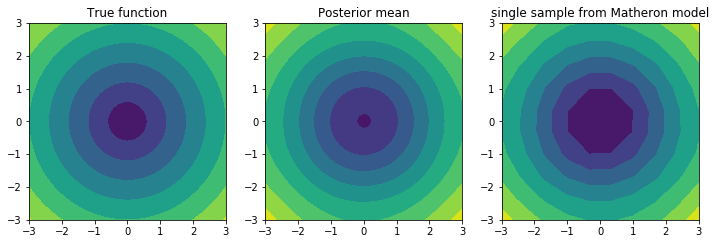

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(12, 15))
x1list = np.linspace(-3.0, 3.0, 100)
x2list = np.linspace(-3.0, 3.0, 100)
X1, X2 = np.meshgrid(x1list, x2list)
ax[0].set_title('True function')
ax[0].set_aspect('equal', 'box')

# plot the true data generating process
true_Z = np.sqrt(X1**2 + X2**2)
cp = ax[0].contourf(X1, X2, true_Z)

# plot the SVGP mean prediction
positions = np.vstack([X1.ravel(), X2.ravel()])
mean, var = SVGP_model.predict_f(positions.T)
cp = ax[1].contourf(X1, X2, np.reshape(mean.numpy().T, X1.shape))
ax[1].set_title('Posterior mean')
ax[1].set_aspect('equal', 'box')

# plot a matheron sample_SVGP sample
x1list_coarse = np.linspace(-3.0, 3.0, 10)
x2list_coarse = np.linspace(-3.0, 3.0, 10)
X1_coarse, X2_coarse = np.meshgrid(x1list_coarse, x2list_coarse)
positions_coarse = np.vstack([X1_coarse.ravel(), X2_coarse.ravel()])
samples = matheron_sample_SVGP_model.predict_f_samples(positions_coarse.T, num_samples=1)
cp = ax[2].contourf(X1_coarse, X2_coarse, np.reshape(samples.numpy().T, X1_coarse.shape))
ax[2].set_title('Single sample from Matheron model')
ax[2].set_aspect('equal', 'box')

plt.show()

In [22]:
#compare elbos
SVGP_model_elbo = SVGP_model.elbo((X, Y))
sample_SVGP_model_elbos = [sample_SVGP_model.elbo((X, Y)).numpy() for _ in range(10)]
expected_sample_elbo = np.mean(sample_SVGP_model_elbos)
var_sample_elbo = np.var(sample_SVGP_model_elbos)
np.testing.assert_allclose(SVGP_model_elbo, expected_sample_elbo, rtol=0.05, atol=0.0) 

matheron_sample_SVGP_model_elbos = [matheron_sample_SVGP_model.elbo((X, Y)).numpy() for _ in range(10)]
expected_matheron_sample_elbo = np.mean(matheron_sample_SVGP_model_elbos)
var_matheron_sample_elbo = np.var(matheron_sample_SVGP_model_elbos)

stochastic_inv_conditional
sub conditional
Running invariant kernel sample_conditional.
Running invariant kernel sample_conditional.
Running invariant kernel sample_conditional.
Running invariant kernel sample_conditional.
Running invariant kernel sample_conditional.
Running invariant kernel sample_conditional.
Running invariant kernel sample_conditional.
Running invariant kernel sample_conditional.
Running invariant kernel sample_conditional.
Running invariant kernel sample_conditional.


In [23]:
print('SVGP model elbo is:', SVGP_model_elbo.numpy())
print('Expectation and variance of the sample ELBO estimator:', expected_sample_elbo, var_sample_elbo)
print('Expectation and variance of the Matheron sample ELBO estimator:', expected_matheron_sample_elbo, var_matheron_sample_elbo)

SVGP model elbo is: 303.4978482937696
Expectation and variance of the sample ELBO estimator: 301.56725897890544 7.285686394613364
Expectation and variance of the Matheron sample ELBO estimator: 303.199972465335 5.992482632058222
